# Resume recommendation engine using NLP techniques

Purpose of the following code is to help us understand if we can come up with a shortlist of candidates from a pool of resumes based on the requirements given by the client using a relevancy score calculated using cosine similarities.

Some observations
*Plot works best with one word skillsets such as Python,Java,SQL,Hadoop

*Works best with mainstream skillset combinations in related fields of technology mainly because of the
nature of the dataset.
 ex - Java skillsets - Java,J2EE,Spring,SQL,Hadoop
      Python+Java skillsets
* Works very well with skillset searches across categries as well.

In [1]:
# %load RecommendationHelper.py
#importing all required libraries
from io import StringIO
import pandas as pd
from collections import Counter
import copy
import re
import nltk
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()
from spacy.matcher import PhraseMatcher
import os
import numpy as np
import matplotlib.pyplot as plt
#RecommondationHelper file has all the functions that are called in this notebook.
#File has more docmentation regarding the functions
from RecommendationHelper_Final import *

In [2]:
#import the dataset in df_in dataframe
df_in = import_dataset()

In [3]:
#messy dataset
df_in

,Category,Resume,First_Name,Last_Name
0,Data Science,Skills * Programming Languages: Python (pandas...,Shepherd,Herman
1,Data Science,Education Details\r\nMay 2013 to May 2017 B.E ...,Kayleigh,Schaden
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Sallie,Dibbert
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Ivie,Schroeder
4,Data Science,"Education Details\r\n MCA YMCAUST, Faridaba...",Cordella,Harber
...,...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Violet,Abshire
958,Testing,â Willingness to accept the challenges. â ...,Lavonne,Smith
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",Brendon,Feeney
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,Sherilyn,Hills


In [4]:
#calling the clean_resume function and fixing the iteration issues we had using fix_subset function
df_in['cleaned_resume'] = df_in.Resume.apply(lambda x: clean_resume(x))
df_in = df_in.drop('Resume', 1)
df_data = fix_subset(df_in)

In [5]:
#dataset after preprocessing and cleaning
df_data

,Category,Name,Resume
0,Data Science,Shepherd Herman,Skills Programming Languages Python pandas num...
1,Data Science,Kayleigh Schaden,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,Sallie Dibbert,Areas of Interest DL Control System Design Pro...
3,Data Science,Ivie Schroeder,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,Cordella Harber,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
957,Testing,Violet Abshire,Computer Skills Proficient in MS office Word B...
958,Testing,Lavonne Smith,Willingness to a ept the challenges Positive ...
959,Testing,Brendon Feeney,PERSONAL SKILLS Quick learner Eagerness to lea...
960,Testing,Sherilyn Hills,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [6]:
df_data.to_csv('resumes.csv') #saving the dataframe into a csv. Useful for cross-verification purposes

In [7]:
#Enter in the order of preference separated by commas
key_main = input('Enter the main skillset you are looking for: ')

Enter the main skillset you are looking for: Python,SQL,Tableau


In [8]:
#Enter any good to have skills separated by commas
key_opt = input('Enter what other skillsets would be good to have: ')

Enter what other skillsets would be good to have: ML,NLP


In [9]:
#convert the input skills to a list so that we can iterate over them
reqs = key_main+','+key_opt
keywords = reqs.split(',')
print(keywords)

['Python', 'SQL', 'Tableau', 'ML', 'NLP']


In [10]:
#helper_function is helpful in calling the other utility functions
#in a preset order so that we can see how each resume fares in terms of the 
#skillset keyword frequency
skill_count_list = helper_function(df_data,keywords)
df_skills = pd.DataFrame(skill_count_list)

In [11]:
df_skills.head(100)

,Python,SQL,Tableau,ML,NLP,Name
0,6,0,2,0,0,Shepherd Herman
1,1,0,0,2,0,Kayleigh Schaden
2,5,0,0,1,0,Sallie Dibbert
3,6,12,4,0,2,Ivie Schroeder
4,1,0,0,0,0,Cordella Harber
...,...,...,...,...,...,...
95,0,0,0,0,0,Helen Hayes
96,0,0,0,0,0,Donavon Hahn
97,0,0,0,0,0,Helmer Cassin
98,0,0,0,0,0,Primus Cummings


In [12]:
df_plot = df_skills.sort_values(keywords[0],ascending=False)
df_plot = df_plot.set_index('Name')
df_plot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 962 entries, Kristina Mante to Algot Rogahn
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Python   962 non-null    int64
 1   SQL      962 non-null    int64
 2   Tableau  962 non-null    int64
 3   ML       962 non-null    int64
 4   NLP      962 non-null    int64
dtypes: int64(5)
memory usage: 45.1+ KB


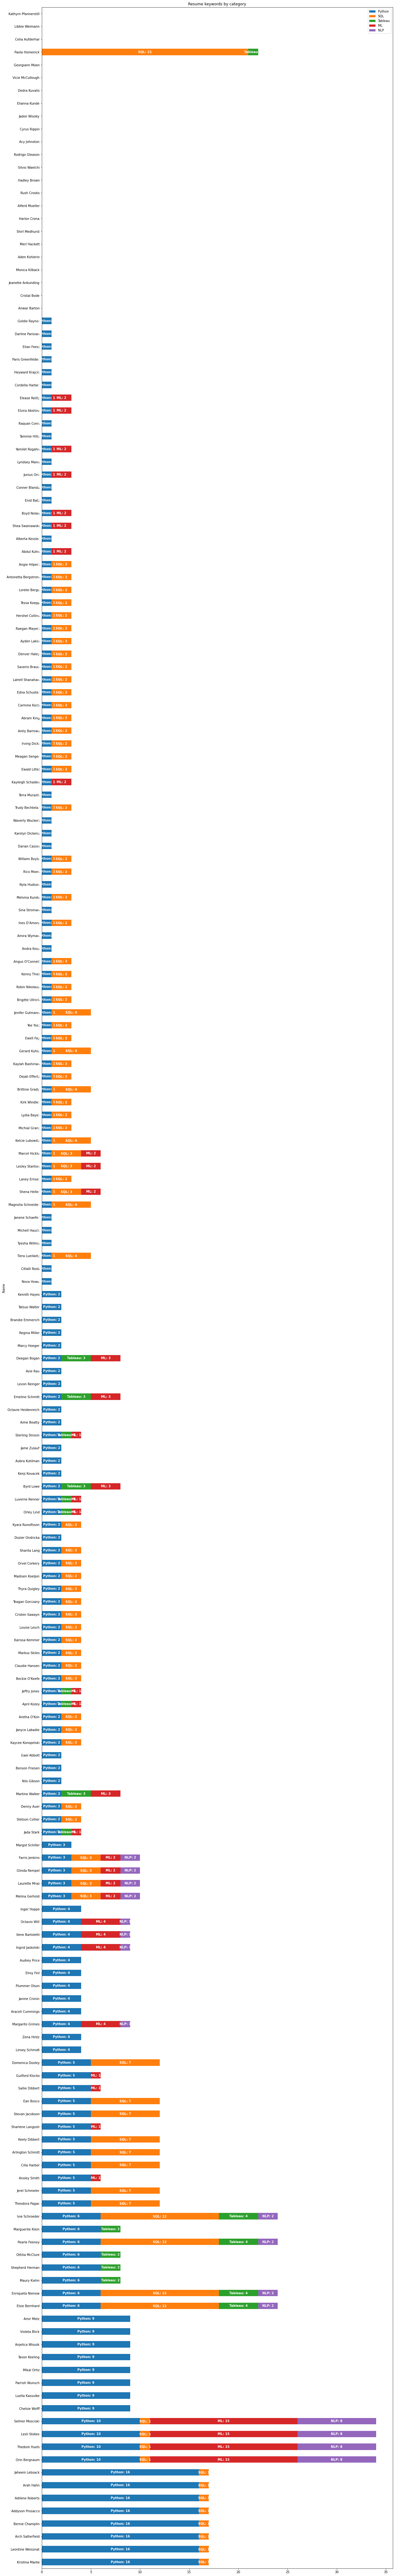

In [13]:
#Plotting the skillsets for each candidate
skillset_plot = plot_skillset_profile(df_plot)

In [14]:
#get top 10 candidate recommendations for each skill
recommendations_top10 = recommendations(df_skills[:200],keywords)
df_top10 = pd.DataFrame(recommendations_top10)
df_top10.head(100)

,Skill,Candidates
0,Python,Orin Bergnaum
1,Python,Thedore Huels
2,Python,Selmer Mosciski
3,Python,Lesli Stokes
4,Python,Shepherd Herman
5,Python,Ivie Schroeder
6,Python,Marguerite Klein
7,Python,Pearle Feeney
8,Python,Ottilia McClure
9,Python,Elsie Bernhard


In [15]:
#candidates having at least the top 3 skills required by the client
cond_1 = (df_skills[keywords[0]]>0) & (df_skills[keywords[1]]>0)&(df_skills[keywords[2]]>0)
top3skills = list(df_skills['Name'].loc[cond_1])
print(top3skills)

['Ivie Schroeder', 'Pearle Feeney', 'Elsie Bernhard', 'Enriqueta Nienow']


In [16]:
#get a gist of the experience for the candidates with the top 3 skills
for i in top3skills:
    print(i,'\n')
    #print(experience_chunks(df_data,i))
    #print(experience_idx(df_data,i))
    print(experience_rake(df_data,i,keywords),'\n')

Ivie Schroeder 

sql industry cross industry
tableau infer meaningful insights
1 year months python experience
hana python interface
complex sql scripts
sql profiler involved
pl sql
None 

Pearle Feeney 

sql industry cross industry
tableau infer meaningful insights
1 year months python experience
hana python interface
complex sql scripts
sql profiler involved
pl sql
None 

Elsie Bernhard 

sql industry cross industry
tableau infer meaningful insights
1 year months python experience
hana python interface
complex sql scripts
sql profiler involved
pl sql
None 

Enriqueta Nienow 

sql industry cross industry
tableau infer meaningful insights
1 year months python experience
hana python interface
complex sql scripts
sql profiler involved
pl sql
None 



In [17]:
######COMING UP WITH DIFFERENT COMBINATIONS OF SKILL SETS AND RECOMMENDATIONS ###########

In [18]:
#SQL,Python,Tableau + ML

In [19]:
#top 3 skills and any one of optional skill 
cond_2 = (df_skills[keywords[0]]>0) & (df_skills[keywords[1]]>0)&(df_skills[keywords[2]]>0)&(df_skills[keywords[3]]>0)
top3skills_skill3 = list(df_skills['Name'].loc[cond_2])
print(top3skills_skill3)

[]


In [20]:
#SQL,Python,Tableau + Analytics

In [21]:
#top 3 skills and any one of optional skill 
cond_3 = (df_skills[keywords[0]]>0) & (df_skills[keywords[1]]>0)&(df_skills[keywords[2]]>0)&(df_skills[keywords[4]]>0)
top3skills_skill4 = list(df_skills['Name'].loc[cond_3])
print(top3skills_skill4)

['Ivie Schroeder', 'Pearle Feeney', 'Elsie Bernhard', 'Enriqueta Nienow']


In [22]:
#SQL,Python + ML

In [23]:
#top 2 skills and any one of the optional skills
cond_4 = ((df_skills[keywords[0]]>0) & (df_skills[keywords[1]]>0))&(df_skills[keywords[3]]>0) 
top2skills_skill3 = list(df_skills['Name'].loc[cond_4])
print(top2skills_skill3)

['Orin Bergnaum', 'Glinda Rempel', 'Thedore Huels', 'Laurette Mraz', 'Selmer Mosciski', 'Melina Gerhold', 'Lesli Stokes', 'Farris Jenkins', 'Shena Heller', 'Lesley Stanton', 'Marcel Hickle']


In [24]:
#SQL,Python + Analytics

In [25]:
#top 2 skills and  one of the optional skills
cond_5 = ((df_skills[keywords[0]]>0) & (df_skills[keywords[1]]>0))&(df_skills[keywords[4]]>0) 
top2skills_skill4 = list(df_skills['Name'].loc[cond_5])
print(top2skills_skill4)

['Ivie Schroeder', 'Orin Bergnaum', 'Glinda Rempel', 'Pearle Feeney', 'Thedore Huels', 'Laurette Mraz', 'Elsie Bernhard', 'Selmer Mosciski', 'Melina Gerhold', 'Enriqueta Nienow', 'Lesli Stokes', 'Farris Jenkins']


In [26]:
#Python,Tableau + ML

In [27]:
cond_6 = ((df_skills[keywords[1]]>0) & (df_skills[keywords[2]]>0))&(df_skills[keywords[3]]>0) 
top2_3skills_skill3 = list(df_skills['Name'].loc[cond_6])
print(top2_3skills_skill3)

[]


In [28]:
#Python,Tableau + Analytics

In [29]:
cond_6 = ((df_skills[keywords[1]]>0) & (df_skills[keywords[2]]>0))&(df_skills[keywords[4]]>0) 
top2_3skills_skill4 = list(df_skills['Name'].loc[cond_6])
print(top2_3skills_skill4)

['Ivie Schroeder', 'Pearle Feeney', 'Elsie Bernhard', 'Enriqueta Nienow']


In [30]:
#SQL,Tableau + ML

In [31]:
cond_7 = ((df_skills[keywords[0]]>0) & (df_skills[keywords[2]]>0))&(df_skills[keywords[3]]>0) 
top1_3skills_skill3 = list(df_skills['Name'].loc[cond_7])
print(top1_3skills_skill3)

['Emeline Schmitt', 'Byrd Lowe', 'Martine Walker', 'Deegan Bogan', 'Jeffry Jones', 'Jada Stark', 'April Kozey', 'Sterling Strosin', 'Luverne Renner', 'Orley Lind']


In [32]:
#SQL,Tableau + Analytics

In [33]:
cond_8 = ((df_skills[keywords[0]]>0) & (df_skills[keywords[2]]>0))&(df_skills[keywords[4]]>0) 
top1_3skills_skill4 = list(df_skills['Name'].loc[cond_8])
print(top1_3skills_skill4)

['Ivie Schroeder', 'Pearle Feeney', 'Elsie Bernhard', 'Enriqueta Nienow']


In [34]:
### Final recommendations###

In [35]:
print('SQL Python Tableau - candidate recommendations for the top 3 skills the client wanted','\n')
for i in top3skills:
    print(i,'\n')

SQL Python Tableau - candidate recommendations for the top 3 skills the client wanted 

Ivie Schroeder 

Pearle Feeney 

Elsie Bernhard 

Enriqueta Nienow 



In [36]:
print('SQL,Python,Tableau + ML - candidate recommendations','\n')
for i in top3skills_skill3:
    print(i,'\n')

SQL,Python,Tableau + ML - candidate recommendations 



In [37]:
print('SQL,Python,Tableau + Analytics - candidate recommendations','\n')
for i in top3skills_skill4:
    print(i,'\n')

SQL,Python,Tableau + Analytics - candidate recommendations 

Ivie Schroeder 

Pearle Feeney 

Elsie Bernhard 

Enriqueta Nienow 



In [38]:
print('SQL,Python + ML - candidate recommendations','\n')
for i in top2skills_skill3:
    print(i,'\n')

SQL,Python + ML - candidate recommendations 

Orin Bergnaum 

Glinda Rempel 

Thedore Huels 

Laurette Mraz 

Selmer Mosciski 

Melina Gerhold 

Lesli Stokes 

Farris Jenkins 

Shena Heller 

Lesley Stanton 

Marcel Hickle 



In [39]:
print('SQL,Python + Analytics - candidate recommendations','\n')
for i in top2skills_skill4:
    print(i,'\n')

SQL,Python + Analytics - candidate recommendations 

Ivie Schroeder 

Orin Bergnaum 

Glinda Rempel 

Pearle Feeney 

Thedore Huels 

Laurette Mraz 

Elsie Bernhard 

Selmer Mosciski 

Melina Gerhold 

Enriqueta Nienow 

Lesli Stokes 

Farris Jenkins 



In [40]:
print('Python,Tableau + ML - candidate recommendations','\n')
for i in top2_3skills_skill3:
    print(i,'\n')

Python,Tableau + ML - candidate recommendations 



In [41]:
print('Python,Tableau + Analytics  - candidate recommendations','\n')
for i in top2_3skills_skill4:
    print(i,'\n')

Python,Tableau + Analytics  - candidate recommendations 

Ivie Schroeder 

Pearle Feeney 

Elsie Bernhard 

Enriqueta Nienow 



In [42]:
print('SQL,Tableau + ML  - candidate recommendations','\n')
for i in top1_3skills_skill3:
    print(i,'\n')
print('No candidate found with the mentioned skills')

SQL,Tableau + ML  - candidate recommendations 

Emeline Schmitt 

Byrd Lowe 

Martine Walker 

Deegan Bogan 

Jeffry Jones 

Jada Stark 

April Kozey 

Sterling Strosin 

Luverne Renner 

Orley Lind 

No candidate found with the mentioned skills


In [43]:
print('SQL,Tableau + Analytics  - candidate recommendations','\n')
for i in top1_3skills_skill4:
    print(i,'\n')

SQL,Tableau + Analytics  - candidate recommendations 

Ivie Schroeder 

Pearle Feeney 

Elsie Bernhard 

Enriqueta Nienow 



In [44]:
#Match job posting with resumes

In [45]:
posting = '''Drive the design and development of deep learning technologies for health care applications such as segmentation, anomaly detection, image processing, natural language understanding, time series analysis, etc. Provide guidance to data collection teams on test protocols including design of experiments, sample size, and statistical distributions. Design and implement networks to provide automation of clinical tasks using one or more of medical images, electronic medical records, waveforms, and clinical reports. Demonstrate algorithms to meet accuracy requirements on general subject population through statistical analyses and error estimation. Gather and analyze data, devise innovative data science solutions and build prototypes to enable development of high-performance algorithms in scalable, product-ready code. Initiate and propose unique and promising deep learning capabilities, develop new and innovative algorithms and technologies, pursuing patents where appropriate. Stay current on published state-of-the-art algorithms and competing technologies. Contribute to the development of software and data delivery platforms that are service-oriented with reusable components across teams (multiple teams) that can be orchestrated together into different methods for different businesses. Research and evaluate emerging technology, industry and market trends to assist in product development and/or operational support activities to for multiple teams or complex scenarios.

                Qualifications / Requirements:

                Position requires a Ph.D, or foreign degree equivalent, in “STEM” major (Science, Technology, Engineering, Mathematics) or a related field and two (2) years of experience in the artificial intelligence/deep learning industry in a related occupation. The position also requires: 2 years of experience implementing deep learning models including CNN, RNN, LSTM and GANS or with waveform/time-series data using RNN/LSTM; 2 years of experience using PYTHON, TENSORFLOW, KERAS, CAFFE, or CNTK.
                '''

In [46]:
clean_posting = re.sub('\s+', ' ', posting)  # remove extra whitespace

In [47]:
#candidates having at least the top 3 skills required by the client
cond_1 = (df_skills[keywords[0]]>0) & (df_skills[keywords[1]]>0)&(df_skills[keywords[2]]>0)
top3skills = list(df_skills['Name'].loc[cond_1])
print(top3skills)

['Ivie Schroeder', 'Pearle Feeney', 'Elsie Bernhard', 'Enriqueta Nienow']


In [50]:
resume_1 = df_data[df_data['Name'] == 'Ivie Schroeder']

In [51]:
resume = resume_1['Resume'].tolist()
resume = resume[0]
resume

'Skills R Python SAP HANA Tableau SAP HANA SQL SAP HANA PAL MS SQL SAP Lumira C Linear Programming Data Modelling Advance Analytics SCM Analytics Retail Analytics Social Media Analytics NLP Education Details January 2017 to January 2018 PGDM Business Analytics Great Lakes Institute of Management Illinois Institute of Technology January 2013 Bachelor of Engineering Electronics and Communication Bengaluru Karnataka New Horizon College of Engineering Bangalore Visvesvaraya Technological University Data Science Consultant Consultant Deloitte USI Skill Details LINEAR PROGRAMMING experience 6 months RETAIL experience 6 months RETAIL MARKETING experience 6 months SCM experience 6 months SQL experience Less than 1 year months DL experience Less than 1 year months Machine learning experience Less than 1 year months Python experience Less than 1 year months R experience Less than 1 year monthsCompany Details company Deloitte USI description The project involved analysing historic deals and comin

In [52]:
text = [resume, clean_posting]

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
count_matrix = cv.fit_transform(text)

In [54]:
from sklearn.metrics.pairwise import cosine_similarity

#Print the similarity scores
print("\nSimilarity Scores:")
print(cosine_similarity(count_matrix))


Similarity Scores:
[[1.         0.56890017]
 [0.56890017 1.        ]]


In [55]:
#get the match percentage
matchPercentage = cosine_similarity(count_matrix)[0][1] * 100
matchPercentage = round(matchPercentage, 2) # round to two decimal
print("Your resume matches about "+ str(matchPercentage)+ "% of the job description.")

Your resume matches about 56.89% of the job description.


In [69]:
resume_2 = df_data[df_data['Name'] == 'Byrd Lowe']
resume = resume_2['Resume'].tolist()
resume = resume[0]

In [70]:
text = [resume, clean_posting]
cv = CountVectorizer()
count_matrix = cv.fit_transform(text)

#Print the similarity scores
print("\nSimilarity Scores:")
print(cosine_similarity(count_matrix))

matchPercentage = cosine_similarity(count_matrix)[0][1] * 100
matchPercentage = round(matchPercentage, 2) # round to two decimal
print("Your resume matches about "+ str(matchPercentage)+ "% of the job description.")


Similarity Scores:
[[1.         0.45522854]
 [0.45522854 1.        ]]
Your resume matches about 45.52% of the job description.


In [76]:
text = resume

In [77]:
skills = {'Data Science':['Data Science','Analysis', 'ML','Python', 'Visualization', 'goal', 'find', 'Image', 'Face', 'face','Analytics',
                          'Algorithms', 'Intelligence', 'Research', 'science','Scientist', 'Spark', 'insight', 'report', 'product', 'academic', 'pattern', 'form', 'Hadoop', 
                          'PySpark','tweet', 'analysis',
                          'Expertise', 'Quantitative', 'Decision', 'Predictive', 'Modeling','Personalization', 'KPI', 
                          'Dashboards', 'Big', 'Queries', 'Interpretation', 'Mining', 'Tools','Forecasts','spark', 'python','working', 'industry',
                          'Teaching', 'Appointments', 'Teach', 'undergraduate', 'adjunct', 'faculty',
                          'analytics', 'recommendation', 'enabling', 'strategic', 'planning','distribution',
                          'Bot', 'AWS', 'LEX', 'Tensor flow','chat', 'bot', 'query', 'institute', 'human', 
                          'effort', 'man', 'made', 'error', 'case', 'participant', 'student', 'Web', 'scraping', 'Selenium', 'driver',
                          'Recognize', 'similarity', 'image', 'recognition', 'recognizing', 'fraud',
                          'special', 'set', 'extracted', 'recognized', 'person', 'already', 'applied', 'loan', 'somewhere', 'else', 
                          'Sentiment', 'NLP', 'Apache', 'Bluemix', 'highly', 'emphasis', 'Twitter',
                          'taken', 'mobile', 'network', 'provider', 'sentiment', 'analyze','MATLAB','computer', 'science'],
          'Law':['working', 'Junior', 'LLB', 'LAW', 'Com', 'Commerce', 'HSC', 'SSC', 'Advocate'],
          'Arts':[
                  'Drawing', 'Art', 'Committee', 'Academic', 'Programme', 'Detail',
                  'Ministry', 'Youth', 'Affairs', 'Sports', 'New', 'North', 'Strengths', 'Ability', 'Learn', 'Mistakes', 'Honesty', 'Ready', 'challenge', 
                  'responsibility', 'learning', 'adaptability', 'confidence', 'Declaration', 'faithfully', 
                  'Organization', 'Designation', 'Period', 'Commerce', 'Science', 'Political', 'Sci'],
          'Web design':['HTML5', 'CSS3', 'jQuery','Bootstrap', 'JavaScript', 'Graphics', 
                        'Project', 'user','Photoshop', 'Illustrator', 'Designer', 'Virtuous', 'Media', 'Point',
                        'Adobe', 'sense', 'Solution', 'pvt', 'ltd', 'Presented', 'website', 'studying', 'functional', 'design', 'integrated', 'number',
                        'Corel', 'Draw', 
                        'Internship', 'Program', 'Designing','solution', 'information',
                        'flow', 'Data', 'specification'],
          'Mechanical Engineering':['ENGINEERING', 'plastering', 'Automated', 'machine', 'Secured','engineer', 'mould', 'environment','MECHANICAL', 'STATE', 'Design', 'Engineer', 'Mechanical', 'Autocad', 'solidworks', 'catia', 'experience', 'mechanical','AUTOMATIC', 'WALL', 'PLASTERING', 'MACHINE', 'unique','construction', 'building', 'industry','rendering','manual', 'conventional', 'cement', 'mortar', 'brings', 'smooth', 'flat', 'finish', 'It', 'ha', 'future', 'scope', 'Personal', 'Detais', 'Father', 'Name', 'Gyandatt', 'Chauhan'],
          'Sales':['Sales', 'business', 'MS', 'Marketing', 'Manager', 'office', 'lead', 'Sets', 'Multi', 'tasking', 'Collaborative', 'Optimistic', 'Thinking', 'Effective', 'teamleader', 'trainer', 'Visualizing', 'Grip', 'Communication', 'Various', 'Languages', 'Known', 'Value', 'loyalty', 'loyal', 'towards', 'responsibility', 'Compatible', 'working', 'officeEducation', 'MBA', 'Amity', 'Bsc', 'Hotel', 'G', 'art', 'science', 'Institution', 'experience', 'Cohesive', 'responsible', 'Managing', 'area', 'branch', 'follow', 'corporate', 'meet', 'personally', 'give', 'best', 'solution', 'product', 'suitable', 'generate', 'calling', 'client', 'cold', 'call', 'job', 'entrepreneur', 'involves', 'managing', 'small'],
          'Fitness':['GOQii', 'Nutrition', 'Health', 'Manager', 'Clinical', 'player', 'nutrition', 'medical', 'reporting', 'Education', 'wellness', 'coach', 'Data', 'management', 'lifestyle', 'health', 'fitness', 'goal', 'daily', 'Maternal', 'Nutritional', 'Counselling', 'nutrient', 'business', 'leader', 'customer', 'Insurance', 'ordinating', 'client', 'Diploma', 'IGNOU', 'Bachelor', 'Science', 'Dietetics', 'VHD', 'Institute', 'HomeScience', 'Advance', 'PG', 'diploma', 'research', 'SAS', 'Motivate', 'subscriber', 'make', 'permanent', 'shift', 'healthier', 'enhance', 'karma', 'Track', 'analyse', 'captured', 'band', 'Design', 'custom', 'mutually', 'meeting', 'Interact', 'Players', 'basis', 'App', 'text', 'audio', 'VIA', 'Marketing', 'Innovations', 'Viamedia', 'jointly', 'organized', 'National', 'Campaign', 'Evaluation', 'GlaxoSmithKline', 'Consumer', 'Healthcare', 'Conduct', 'Camps', 'practicing', 'Gynaecologists', 'hospital', 'clinic', 'allotted', 'representative', 'Conveying', 'Importance', 'every', 'food', 'contain', 'type', 'Coordinating', 'Area', 'Branch', 'ViaMedia', 'report', 'Department', 'United', 'Care', 'offer', 'Checkups', 'Cities', 'Diagnostic', 'Centres', 'look', 'Operations', 'organising', 'supervising', 'whose', 'come', 'rule', 'regulation', 'IRDA', 'MNYL', 'Iinsurance', 'BAXA', 'life', 'METLIFE', 'Canara', 'HSBC', 'proactively', 'monitor', 'deferral', 'ensure', 'stipulated', 'line', 'Ensuring', 'high', 'professionalism', 'pro', 'active', 'Customer', 'relationship', 'resolving', 'query', 'complaint', 'fair', 'manner', 'specified', 'Lifekonnect', 'centre', 'VLCC', 'HealthCare', 'individual', 'status', 'diet', 'instruction', 'impact', 'eating', 'Create', 'present', 'service', 'Handling', 'enquiry', 'Customers', 'Distributors', 'email', 'letter', 'telephone', 'Preparing', 'Payment', 'Bills', 
                     'Assisting', 'Slimming', 'conference', 'call', 'discus', 'care', 'plan', 'education', 'sale', 'Sales'],
          'Civil Engineering':['Civil', 'AUTOCAD', 'Engineering','CIVIL', 'BE', 'Diploma', 'Polytechnic', 'SSC', 'Industrial', 'Waste', 'Water', 'City', 'High', 'Site', 'Engineer', 'experience', 'construction', 'diploma', 'degree', 'Holder', 'engineering', 'Branch', 'applying', 'post', 'engineer', 'Hoping', 'positive', 'response'],
          'Java':['Java', 'experience', 'developer', 'design', 'bug', 'month', 'Oracle', 'Derby', 'meeting', 'code', 'debugged', 'error', 'improve', 'performance', 'Coordinated', 'system', 'partner', 'finalize', 'confirm', 'Consistently', 'deadline', 'production', 'order', 'Collaborated', 'identify', 'number', 'software', 'provided', 'maintenance', 'fix', 'patch', 'set', 'existing', 'working', 'Language', 'Operating', 'System', 'Linux', 'CentOS', 'Databases', 'SQL', 'Embedded', 'Database', 'IDE', 'Eclipse', 'Oxygen', 'Tools', 'SonarQube', 'Putty', 'Responsibilitis', 'Education', 'Bachelor', 'Engineering', 'Computer', 'Phule', 'LINUX', 'Adavance', 'Having', 'Payment', 'Gateway', 'Solutions', 'provider', 'Core', 'Hardworking', 'enthusiastic', 'multicultural'],
          'Business Analyst':['cash', 'Maintain', 'MIS', 'report', 'Business', 'Analyst', 'Daily', 'prepare', 'Handling', 'Excel', 'Research', 'Sales', 'Block', 'Fund', 'Corporate', 'position', 'planning', 'excel', 'Provide', 'complete', 'information', 'ordinate', 'client', 'Education', 'TYBCOM', 'Commerce', 'Motilal', 'Oswal', 'IT', 'Operation', 'Institutional', 'Equities', 'CAG', 'Derivative', 'Preparing', 'Auto', 'Dashboard', 'Trading', 'Macro', 'Create', 'Innovative', 'Report', 'Related', 'Data', 'BD', 'GEO', 'Investors', 'Meeting', 'track', 'Interest', 'Sector', 'FSS', 'Project', 'Description', 'ATM', 'BANK', 'CASH', 'DEPA', 'MENT', 'custodian', 'DEGREE', 'COURSE', 'YEAR', 'PASSING', 'GRADE', 'UNIVERSITY', 'PERCENTAGE', 'BROKING', 'Reporting', 'Assistant', 'Manager', 'SR', 'Manger', 'Quality', 'assurance', 'productivity', 'adding', 'comment', 'remark', 'mailing', 'modification', 'number', 'Mailing', 'branch', 'Coordinating', 'RM', 'script'],
          'SAP':['SAP', 'experience', 'month', 'Experience', 'ABAP', 'Fiori', 'IS', 'Retail', 'Gateway', 'SD', 'implementation', 'Technical', 'ALE', 'IDOC', 'oDATA', 'EWM', 'APO', 'Netweaver', 'Techno', 'Auto', 'HANA', 'upgrade', 'multiple', 'client', 'Expertise', 'module', 'MM', 'FI', 'customer', 'support', 'technical', 'issue', 'task', 'end', 'user', 'ability', 'business', 'Education', 'Architect', 'Consultant', 'SHANA', 'EDI', 'oData', 'Functional', 'functional', 
                 'NetWeaver', 'feature', 'Extensibility', 'Embedded', 'Analytics', 'includes', 'role', 'varies', 'developer', 'subject', 'matter', 'expert', 'Strong', 'maintenance', 'Certified', 'associate', 'ha', 'certification', 'ITIL', 'Foundation', 'PRINCE2', 'practitioner', 'Full', 'Lifecycle', 'global', 'Direct', 'exposure', 'United', 'States', 'America', 'Malaysia', 'FRICEW', 'component', 'CO', 'PS', 'PP', 'CS', 'PM', 'QM', 'HR', 'SCM', 'SOLMAN', 'GTS', 'PI', 
                 'BI', 'Vistex', 'ProShip', 'HPQC', 'IBM', 'ManageNow', 'CA', 'service', 'desk', 'Loftware', 'Data', 'Matrix', 'created', 'number', 'POCs', 'potential', 'essfully', 'completed', 'roll', 'diverse', 'industry', 'leading', 'size', 'Customization', 'area', 'Upgrading', 'ECC6', 'Unicode', 'conversion', 'Skilled', 'document', 'identifying', 'handling', 'training', 'Proven', 'interact', 'system', 'analyst', 'design', 'phase', 'Extensive', 'analyzing', 'complicated', 
                 'effort', 'estimation', 'creating', 'specification', 'Experienced', 'onsite', 'offshore', 'model', 'lead', 'Excellent', 'communication', 'skill', 'participation', 'inter', 'ordination', 'oriented', 'attitude', 'pre', 'sale', 'activity', 'Thorough', 'management', 'quality'],
          'Testing':['Testing', 'knowledge', 'Excellent', 'testing', 'month', 'experience', 'Automation', 'Selenium', 'Manual', 'Software', 'Box', 'Functional', 'Integration', 'System', 'test', 'case', 'Defect', 'Test', 'Project', 'Resume', 'based', 'technology',
                     'Data', 'Computer', 'Science', 'BLACK', 'BOX', 'Technical', 'Summary', 'completed', 'CORPORATE', 'TRAINING', 'Source', 'Code', 'Technology', 'IDE', 'TestNG', 'Grid', 'JENKINS', 'Apache', 'POI', 'SDLC', 'White', 'Black', 'Exposure', 'Scenarios', 'including', 
                     'design', 'technique', 'Build', 'release', 'Ad', 'hoc', 'smoke', 'usability', 'reliability', 'exploratory', 'Globalization', 'Compatibility', 'Understand', 'STLC', 'regression', 'retesting', 'tracking', 'Life', 'Cycle', 'Knowledge', 'plan', 'Traceability', 
                     'Matrix', 'Internship', 'Name', 'Extractor', 'Duration', 'Role', 'Environment', 'Jdbc', 'Servlets', 'Jsp', 'Web', 'Application', 'MS', 'ess2007', 'extractor', 'provides', 'analyze', 'mass', 'volume', 'detect', 'resume', 'covered', 'valuable', 'information', 
                     'site', 'recruitment', 'Strengths', 'Able', 'Operational', 'Analysis', 'Communication', 'Active', 'learning', 'critical', 'thinking', 'interpersonal', 'skill', 'willing', 'take', 'challenge', 'responsibility', 'Ability', 'learn', 'minimal', 'period', 'Education',
                     'BCS', 'MGM', 'MCA', 'fromJSPM', 'HSC', 'state', 'SSC', 'APACHE', 'FUNCTIONAL', 'INTEGRATION', 'Mahindra', 'manual', 'software', 'engineer'],
          
          'Electrical Engineering': ['Maintenance', 'Electrical', 'Equipment', 'Machine', 'Panel', 'Motor', 'Day', 'Work', 'ELECTRICAL', 'HT', 'LT', 'Switchgear', 'Up', 'Operation', 'Engineer', 'PVT', 'Kirloskar', 'Relays', 
                                     'Breaker', 'Air', 'Control', 'Pump', 'Battery', 'KW', 'Monitoring', 'Relay', 'Power', 'Contactor', 'Preventive', 'Distribution', 'Line', 'T', 'Various', 'Safety', 'Requirement', 'Education',
                                     'Shivaji', 'HSC', 'SSC', 'Experience', 'Year', 'Months', 'Troubleshooting', 'following', 'All', 'Type', 'Utility', 'Mechanical', 'Diesel', 'Generator', 'Set', 'Protection', 'System', 'Using', 
                                     'Provision', 'Interlocking', 'Handling', 'Vacuum', 'SF6', 'Circuit', 'Transformer', 'circuit', 'STP', 'WTP', 'Plant', 'Blower', 'Actuators', 'Soft', 'Starter', 'EOT', 'Crane', 'Mono', 'Rail', 
                                     'Centrifugal', 'Vertical', 'Pumps', 'Hydraulic', 'Rolling', 'Lath', 'Drill', 'AHU', 'HVAC', 'Chiller', 'Basic', 'knowledge', 'PLC', 'SCADA', 'Trouble', 'shooting', 'UPS', 'Charger', 'Bank',
                                     'Testing', 'Both', 'Controlling', 'Involved', 'Fault', 'Finding', 'Resetting', 'Correcting', 'Factor', 'Service', 'Submersible', 'MCC', 'PCC', 'Servicing', 'Associated', 'Component', 'Operated', 'Valve', 'Problem', 'Solving', 'Auxiliary',     
                                     'CT', 'PT', 'Effecting', 'Predictive', 'Schedules', 'Order', 'Increase', 'Uptime', 'Reliability', 'Activity', 'Breakdown', 'Conventional', 'Maintaining', 'Log', 'Book', 'Check', 'List', 
                                     '22kV', 'Main', 'Feeder', '11kV', 'Maint', 'H', 'L', 'Break', 'Down', 'SAFETY', 'Knowledge', 'Aspect', 'Its', 'Application', 'Familiar', 
                                     'Tools', 'Lockout', 'Tag', 'Issue', 'Permit', 'Clearance', 'Network', 'Proper', 'Usage', 'Protective', 'ident', 'Statistics'],
          
          'Operations': ['activity', 'client', 'GES', 'FAT', 'Client', 'Monitored', 'Project', 'Korea', 'meeting', 'Honeywell', 'System', 'No', 'PLC', 'panel', 'Engineering', 'Lead', 'HPM', 'Attending', 'deliverable', 'document', 'quality', 'schedule', 'Manager', 'Ensuring', 'LE', 'PM', 'review', 'Pre', 'Process', 'Wiring', 'Controls', 'proposal', 'system', 'customer', 'scope', 'DCS', 'Job', 'delivery', 'mentioned', 'Qatar', 'control', 'FDS', 'Operations', 'issue', 'Monitoring', 'Planning', 'internal', 'technical', 'HONEYWELL', 'design', 'estimation', 'check', 'test', 'ensuring', 'weekly', 'engineering', 'HMI', 'point', 'completed',
                         'essfully', 'preparation', 'End', 'Nos', 'Performed', 'Quality', 'based', 'communication', 'Work', 'comment', 'standard', 'whenever', 'Completed', 'EPKS', 'Application', 'telephonic', 'Marshalling', 'Testing', 'loop', 'Database', 'Redundant', 'Cabinets', 'MARSHALLING', 'testing', 'Delivered', 'Review', 'Schedule', 'term', 'reporting', 'progress', 'ensure', 'stake', 'holder', 'Understanding', 'input', 'Coordinate', 'order', 'KOM', 'engineer', 'Controller', 'Cabinet', 'Network', 'Calculation', 'simple', 'complex', 'methodology', 'Focal', 'Furnace', 'Experion', 'Control', 'JBK', 'Foundation', 'HVAC', 'SCADA', 
                         'schematic', 'UPS', 'manufacturing', 'Checks', 'Schematics', 'presence', 'Delta', 'FZCO', 'GM', 'SOW', 'RFQ', 'support', 'Plans', 'discussion', 'management', 'reviewing', 'Change', 'Responsible', 'site', 'Proposal', 'Preparation', 'Reports', 'Monthly', 'high', 'procedure', 'business', 'implemented', 'information', 'mail', 'Sales', 'offer', 'change', 'Discuss', 'understand', 'pack', 'Communicating', 'sending', 'EM', 'preparing', 'party', 'execution', 'query', 'discussing', 'revised', 'sent', 'Proto', 'type', 'Design', 'Arranging', 'report', 'Leader', 'SIS', 'FGS', 'HARDWARE', 'IS', 'LNG', 'BOM', 'monitoring', 
                         'Graphics', 'su', 'Got', 'AMC', 'TO', 'Migration', 'Oil', 'Public', 'TPS', 'Loop', 'drawing', 'Microsoft', 'VISIO', 'Logic', 'Point', 'building', 'builder', 'PU', 'IO', 'Allocation', 'Downloading', 'Utilities', 'R410', 'Controllers', 'Servers', 'Pair', 'FDM', 'Server', 'Station'],
          'Python Dev': ['experience', 'python','Python', 'analyst', 'scripting', 'programming', 'scrapping', 'functional', 'sorting', 'disease', 'detection', 'Client', 'Dynamics', 'Education', 'Electronics', 'Data', 'developing', 'frontend', 'liabrary', 'numpy', 'panda', 'matplolib', 'request', 'beautiful', 'soap', 
                         'Ace', 'Understanding', 'client', 'walkthroughs', 'business', 'technical', 'design', 'ensure', 'testability', 'Responsible', 'Software', 'Configuration', 'deliverable', 'Technical', 'skill', 'set', 'Languages', 'liabray', 'Scripting', 'GUI', 'Tk', 'dyanamics'],
          'Dev Ops': ['build', 'commerce', 'Nendrasys', 'experience', 'deployment', 'Maven', 'GIT', 'Jenkins', 'script', 'maintaining', 'Devops', 'Engineer', 'month', 'Project', 'product', 'Creating', 'multiple', 'code', 'activity', 'BBL', 'Ant', 'Bitbucket', 'Shell', 'Continuous', 'IT', 
                      'CI', 'It', 'online', 'Developing', 'task', 'branch', 'user', 'portal', 'release', 'Ansible', 'Scripting', 'Integration', 'Software', 'Life', 'Cycle', 'Test', 'Build', 'Tools', 'Configuration', 'management', 'MANAGEMENT', 'Description', 'design', 'develop', 'feature', 
                      'B2B', 'focus', 'stakeholder', 'sale', 'distribution', 'marketing', 'Automation', 'fully', 'automated', 'infrastructure', 'maintenance', 'configuring', 'Repositories', 'managing', 'permission', 'Business', 'daily', 'issue', 'PROJECT', 'Name', 'weekly', 'Responsible', 
                      'merging', 'creating', 'Performance', 'Handled', 'end', 'environment', 'developer', 'QA', 'Sloan', 'payment', 'Trade', 'CORE', 'COMPETENCIES', 'Linux', 'Requirement', 'Gathering', 'Deployment', 'Testing', 'Documentation', 'Reporting', 'Reports', 'SKILLS', 'Primary', 
                      'Dev', 'ops', 'methodology', 'Programming', 'Languages', 'Core', 'Java', 'Version', 'Controls', 'ANT', 'CD', 'Script', 'Application', 'Servers', 'Apache', 'Tomcat', 'serverEducation', 'Masters', 'science', 'information', 'technology', 'Hyderabad', 'Telangana', 'JNTU',
                      'DEPLOYMENT', 'Git', 'DOCUMENTATION', 'CHANGE', 'CONFIGURATION', 'Date', 'Scope', 'sloan', 'customer', 'buy', 'fixer', 'sink', 'Detailed', 'technical', 'Knowledge', 'hand', 'DevOps', 'Engineering', 'Configura', 'tion', 'Installing', 'tool', 'automatically', 'compile', 
                      'package', 'deploy', 'WAR', 'EAR', 'JAR', 'file', 'mul', 'tiple', 'platform', 'Deploying', 'respectively', 'component', 'increase', 'usability', 'closely', 'Architecture', 'Security', 'Services', 'Supporting', 'Analysts', 'getting', 'newly', 'created', 'job', 'Release', 
                      'Communicating', 'Site', 'Analyzing', 'identifying', 'gap', 'tracking', 'log', 'Bangkok', 'Bank', 'Limited', 'Thaitrade', 'Commercial', 'Payment', 'Role', 'simultaneous', 'software', 'lease', 'meeting', 'identify', 'mitigate', 'potential', 'risk', 'associated', 'Analyze',
                      'resolve', 'conflict', 'source', 'automation', 'Implemented', 'setup', 'Master', 'slave'],
          'Network security': ['Network', 'Server', 'Servers', 'Configuration', 'Cisco', 'backup', 'Project', 'R2', 'network', 'DHCP', 'FTP', 'DNS', 'Engineer', 'Installing', 'right', 'Troubleshooting', 'experience', '43', 'LAN', 'Role', 'Roles', 'responsibility', 'Installation', 'Security', 'management', 'Routers', 'Switches', 'Group', 'Policies', 'Backup', 'month', 'Client', 'Type', 'Implementing', 'maintaining', 'schedule', 'Upgrading', 'router', 'configuration', 'file', 'Administration', 'Active', 'Directory', 'TFTP', 'infrastructure', 'Settings', 'networking', 'device', 'Router', 'switch', 'coordinating', 'system', 'administrator', 'implementation', 'Regular', 'Health', 'Checking', 'File', 'Application', 'violation', 'Disk', 'Spaces', 'Maintaining', 'window', 'based', 'Configuring', 'Printers', 'Assigning', 'proper', 'shared', 'drive', 'System', 'Linux', 'Routing', 'Firewall', 'User', 'Implementation', 'troubleshooting', 'Managing', 'user', 'Tally', 'Fortinet', 'policy', 'Symantec', 'Cloudatix', 'WiFi', 'WAN', 'Groups', 'assigning', 'ording', 'organization', 'MMPC', 'Interface', 'Techno', 'MP', 'OS', 'complex', 'professional', 'side', 'Software', 'Utilities', 'server', 'Operating', 'Systems', 'Ubuntu', 'Switching', 'InterVLAN', 'Dynamic', 'Protocols', 'RIPv2', 'RIPng', 'OSPF', 'EIGRP', 'Static', 'ACL', 'VTP', 'VLAN', 'EhterChannel', 'HSRP', 'STP', 'IPv6', 'Lan', 'Structured', 'Cabling', 'RHEL', 'Networking', 'Devices', '1800s', '1900s', '2600s', '3600s', '3800s', '7200s', 'Catalyst', '3700s', '4850s', 'HP', 'ProLiant', 'Dell', 'Lenovo', 'Modem', 'AD', 'RODC', 'Print', 'SCCM', 'WDS', 'RIS', 'computer', 'tool', 'EXEC', 'Virtualisation', 'VMWare', 'ESXi', 'VMware', 'Workstation', 'Oracle', 'VirtualBox', 'GNS3', 'Simulator', 'Education', 'MSC', 'AISECT', 'distance', 'education', 'Com', 'Jiwaji', 'CISCO', 'Railwire', 'Railtel', 'Corporation', 'AP', 'Railway', 'Station', 'Earthing', 'trenching', 'equipment', 'Making', 'plan', 'preparing', 'station', 'environment', 'including', 'cabling', 'installation', 'commissioning', 'handing', 'Bali', 'Pali', 'Rajasthan', 'DPMCU', 'Milknet', 'EMS', 'QMS', 'IT', 'Executive', 'Scindia', 'Fort', 'Gwalior', 'Teva', 'API'],
          'PMO':['experience', 'month', 'Handling', 'BUSINESS', 'ADMINISTRATION', 'Responsible', 'call', 'client', 'working', 'Training', 'customer', 'Business', 'SECONDARY', 'SCHOOL', 'understand', 'existing', 'business', 'solution', 'opportunity', 'delivering', 'stakeholder', 'senior', 'management', 'activity', 'Preparation', 'Document', 'training', 'sale', 'Exceptional', 'communication', 'networking', 'skill', 'essful', 'environment', 'independently', 'Ability', 'pressure', 'multi', 'task', 'Strategies', 'Campaigns', 'Corporate', 'Communications', 'MIS', 'Reporting', 'Documentation', 'Sales', 'Support', 'Back', 'Office', 'Operations', 'New', 'Process', 'Launch', 'escalationsEducation', 'BACHELOR', 'ICFAI', 'Integrated', 'Institute', 'Technology', 'HIGHER', 'SENIOR', 'Public', 'Senior', 'Manager', 'PMO', 'TRAINING', 'DOCUMENTATION', 'OPERATIONS', 'SALES', 'CORPORATE', 'COMMUNICATIONS', 'Review', 'identify', 'functional', 'eliminate', 'waste', 'improve', 'controllership', 'deliver', 'flexibility', 'Identify', 'design', 'prototype', 'potential', 'calculate', 'trade', 'offs', 'cost', 'suggest', 'recommended', 'course', 'action', 'identifying', 'modification', 'Project', 'applying', 'efficient', 'reengineering', 'closely', 'relevant', 'operation', 'unit', 'documentation', 'train', 'change', 'defining', 'scope', 'ordance', 'internal', 'Prepare', 'charter', 'defined', 'timeline', 'Requirement', 'BRD', 'closing', 'Understanding', 'UD', 'UAT', 'completion', 'deployment', 'document', 'SLAs', 'SOPs', 'Conduct', 'impacted', 'ensure', 'smooth', 'transition', 'TELEPERFORMANCE', 'Driving', 'center', 'achieve', 'target', 'overall', 'responsibility', 'exploring', 'selling', 'preference', 'Conceptualizing', 'implementing', 'promotional', 'part', 'pilot', 'batch', 'launch', 'joiner', 'barging', 'Interaction', 'expectation', 'quality', 'session', 'adhoc', 'timely', 'resolution', 'MASTER'],
          'DB': ['Data', 'Oracle', 'experience', 'client', 'Database', 'month', 'business', 'SKILLS', 'SQL', 'IBM', 'programming', 'ML', 'technique', 'SLA', 'skill', 'communication', 'Application', 'Administrator', 'DBMS', 'Blue', 'design', 'Worked', 'Science', 'Foundations', 'TECHNICAL', 'Python', 'linear', 'regression', 'statistical', 'modelling', 'obtained', 'certification', 'Edvancer', 'Eduventures', 'training', 'institute', 'KEY', 'Multitasking', 'working', 'meet', 'high', 'pressure', 'scenario', 'handling', 'sensitive', 'improved', 'player', 'Excellent', 'quick', 'learner', 'Leadership', 'quality', 'networking', 'courage', 'take', 'problem', 'proactively', 'Education', 'Sadvidya', 'Pre', 'CLIENTS', 'MACHINE', 'LEARNING', 'ORACLE', 'EXCELLENT', 'COMMUNICATION', 'Client', 'Cross', 'Shield', 'MA', 'Massachusetts', 'Health', 'Insurance', 'store', 'organize', 'includes', 'capacity', 'planning', 'installation', 'configuration', 'migration', 'security', 'troubleshooting', 'backup', 'recovery', 'Databases', 'installed', 'Linux', 'platform', 'Proficient', 'location', 'facilitating', 'elicitation', 'Handling', 'numerous', 'request', 'solving', 'diligently', 'frame', 'responding', 'quickly', 'effectively', 'production', 'issue', 'Leading', 'ordination', 'conduct', 'weekly', 'checkout', 'server', 'system', 'Certifications', 'Statistics', 'Applied', 'Big', 'Business', 'Analytics', 'Certification', 'Retail', 'Banking', 'predictive', 'model', 'efficient', 'marketing', 'strategy'],
          'Hadoop': ['Data', 'system', 'information', 'Sqoop', 'PRGX', 'Private', 'Limited', 'Project', 'customer', 'hadoop', 'MapMapReduce', 'bank', 'product', 'portal', 'processing', 'hive', 'HDFS', 'Hive', 'Informatica', 'Environment', 'Description', 'wa', 'Role', 'logic', 'Create', 'extract', 'file', 'Database', 'OLTP', 'mapping', 'transformation', 'Hadoop', 'Spark', 'Core', 'Flume', 'Scala', 'Tools', 'UNIX', 'MySQL', 'Hodoop', 'developer', 'behavior', 'transaction', 'allows', 'report', 'based', 'offer', 'day', 'analytics', 'budget', 'framework', 'regulation', 'business', 'script', 'store', 'processed', 'html', 'micro', 'site', 'implementation', 'table', 'Pfizer', 'Repository', 'sql', 'request', 'directly', 'created', 'DDR', 'clinical', 'bug', 'workflow', 'SCD', 'load', 'Testing', 'Technical', 'Set', 'Big', 'Ecosystems', 'HBase', 'Pig', 'Other', 'Language', 'Java', 'SQL', 'PLSQL', 'Sell', 'Scripting', 'ETL', 'Power', 'Center8', 'x', 'Talend', 'Eclipse', 'Intellij', 'Idea', 'Platforms', 'Family', 'Linux', 'Cloudera', 'Databases', 'Oracle', 'MAHARASHTRA', 'IN', 'wanted', 'avail', 'analyzing', 'expenditure', 'spending', 'range', 'online', 'shopping', 'medical', 'expense', 'hospital', 'cash', 'debit', 'card', 'usage', 'create', 'analytical', 'display', 'built', 'java', 'login', 'see', 'make', 'basis', 'plan', 'watch', 'financial', 'forecast', 'embedded', 'analyes', 'rule', 'placed', 'regulator', 'respective', 'country', 'interest', 'rate', 'complied', 'big', 'Import', 'legacy', 'flume', 'Implement', 'analysis', 'Per', 'spark', 'loading', 'Sourcing', 'attribute', 'retrieve', 'correct', 'result', 'Purpose', 'terabyte', 'meaningful', 'solution', 'open', 'source', 'w', 'stored', 'job', 'Which', 'trun', 'includes', 'getting', 'raw', 'website', 'obtain', 'user', 'vistor', 'tracking', 'export', 'Move', 'crawl', 'flat', 'generated', 'interaction', 'Write', 'tabular', 'format', 'Reports', 'creation', 'Oracle11g', 'American', 'global', 'pharmaceutical', 'corporation', 'headquartered', 'New', 'York', 'City', 'main', 'objective', 'build', 'Because', 'downstream', 'Etrack'],
          'ETL': ['knowledge', 'ETL', 'developer', 'experience', 'SQL', 'Unix', 'Data', 'college', 'Engineering', 'Informatica', 'month', 'Computer', 'skill', 'Yes', 'warehouse', 'Ab', 'intio', 'yee', 'MY', 'HOBBIES', 'Playing', 'Cricket', 'football', 'Reading', 'book', 'Visiting', 'place', 'Travelling', 'DECLARATION', 'hereby', 'declare', 'mentioned', 'information', 'factual', 'correct', 'best', 'belief', 'Date', 'MR', 'MANISH', 'PRABHAKAR', 'PATIL', 'Place', 'Education', 'Bachelor', 'Electronics', 'Telecommunication', 'Patil', 'Navi', 'Bharati', 'vidyapeeth', 'H', 'Khalsa', 'Warehouse', 'Datastage', 'Reliance', 'Infocomm', 'havevbeen', 'working', 'reliance', 'industry', 'past', 'willing'],
          'Dotnet Dev': ['NET', 'experience', 'month', 'ASP', 'MVC', 'JQuery', 'SQL', 'Server', 'Web', 'Entity', 'Framework', 'AJAX', 'Role', 'Involved', 'Everywhere', 'Bootstrap', 'Visual', 'Studio', 'Office', 'Solapur', 'DOT', 'developer', 'Navshar', 'Global', 'Software', 'Navnirman', 'Festival', 'event', 'management', 'Security', 'review', 'employee', 'None', 'TECHNICAL', 'SKILLS', 'Programming', 'Languages', 'API', 'Angular', 'HTML5', 'CSS3', 'Database', 'IDE', 'Code', 'Packages', 'MS', 'es', 'Word', 'Excel', 'Education', 'Sc', 'Computer', 'Science', 'BOOTSTRAP', 'jQuery', 'Angularjs', 'PROJECTS', 'WORKED', 'ON', 'technical', 'scheduling', 'organizing', 'provides', 'trusted', 'service', 'man', 'power', 'labour', 'Performance', 'Review', 'Project', 'fill', 'particular', 'Employee', 'worked', 'useful', 'take', 'decision', 'appraisal', 'All', 'submitted', 'downloaded', 'PDF', 'format', 'selection'],
          'Blockchain': ['IIT', 'experience', 'Computer', 'month', 'Beginner', 'Networking', 'Analytics', 'Engineering', 'Virtual', 'International', 'Java', 'Brain', 'Interface', 'Data', 'Science', 'Blockchain', 'developer', 'Zhypility', 'Business', 'Limited', 'Promotion', 'Smart', 'Hackthon', 'Research', 'Rome', 'paper', 'epted', 'wa', 'nearby', 'medium', 'Bombay', 'KGP', 'Startup', 'SKILLS', 'Bitcoin', 'Ethereum', 'Solidity', 'Hyperledger', 'Go', 'R3', 'Corda', 'Tendermint', 'Nodejs', 'Programming', 'ML', 'specilaized', 'Server', 'Admin', 'Vision', 'Cloud', 'Computing', 'Reactjs', 'angularEducation', 'Bachelor', 'Technology', 'Dynamic', 'Blood', 'Bank', 'System', 'Senior', 'Secondary', 'Banking', 'VIDYASHRAM', 'PUBLIC', 'SCHOOL', 'NETWORKING', 'DATA', 'ANALYTICS', 'COMPUTER', 'VISION', 'MACHINE', 'LEARNING', 'une', 'Area', 'Owner', 'Amway', 'Enterprise', 'Strategizing', 'Terms', 'Developing', 'Prototype', 'deployment', 'Switch', 'Intern', 'Bharti', 'Airtel', 'Private', 'Scholar', 'Tor', 'Vergata', 'Has', 'research', 'Reality', 'computer', 'proposed', 'Journal', 'Advanced', 'IJAR', 'reviewer', 'Revolutionizing', 'Country', 'IJSRD', 'publication', 'Reliance', 'Jio', 'Maharastra', 'Government', 'handling', 'group', 'Interns', 'marketing', 'sale', 'promote', 'social', 'platform', 'product', 'Stock', 'Marketing', 'Drums', 'Foods', 'Web', 'POSITRON', 'INTERNET', 'making', 'people', 'aware', 'woman', 'equality', 'right', 'raise', 'voice', 'violence', 'mode', 'event', 'source', 'society'],
          'Testing': ['Testing', 'month', 'XP', 'Web', 'Test', 'experience', 'Database', 'Project', 'Name', 'Environment', 'Role', 'Duration', 'Preparing', 'Application', 'Vista', 'Software', 'Android', 'System', 'CSS', 'Engineer', 'Innovations', 'Selenium', 'test', 'Tracking', 'Time', 'Attendance', 'Clients', 'Set', 'OS', 'MYSQL', 'sql', 'server', 'Languages', 'Core', 'Java', 'Technology', 'HTML', 'Manual', 'Other', 'Bug', 'tracking', 'reporting', 'End', 'user', 'handling', 'Education', 'MCS', 'V', 'Pravaranagar', 'HSC', 'Junior', 'SSC', 'Mahavidyalya', 'WINDOWS', 'Analyzing', 'Requirements', 'Plans', 'Scenarios', 'Cases', 'Executing', 'case', 'bug', 'Coordinating', 'developer', 'order', 'fix', 'summary', 'report', 'Reporting', 'quality', 'manager', 'Attending', 'meeting', 'Projects', 'MCCIA', 'Sapphire', 'Park', 'Bramha', 'Suncity', 'Wanless', 'hospital', 'Vehicle', 'Vistor', 'Mobile', 'Tablet', 'Vankan', 'Security', 'Factory', 'Automation', 'Process', 'Annual', 'Maintenance', 'Charges', 'Library']
    }
# Initializie score counters for each area
DataScience = 0
HR = 0
Law = 0
Arts = 0
Webdesign =0
MechanicalEngineering = 0
Sales = 0
Fitness = 0
CivilEngineering = 0
Java = 0
BusinessAnalyst = 0
SAP = 0
Testing = 0
ElectricalEngineering = 0
Operations = 0
PythonDev = 0
DevOps = 0
Networksecurity = 0
PMO = 0
DB = 0
Hadoop = 0
ETL = 0
DotnetDev = 0
Blockchain = 0
# Create an empty list where the scores will be stored
scores = []
# Obtain the scores for each area
for area in skills.keys():

    if area == 'Data Science':
        for word in skills[area]:
            if word in text:
                DataScience +=1
        scores.append(DataScience)

    elif area == 'HR':
        for word in skills[area]:
            if word in text:
                HR +=1
        scores.append(HR)

    elif area == 'Law':
        for word in skills[area]:
            if word in text:
                Law +=1
        scores.append(Law)

    elif area == 'Arts':
        for word in skills[area]:
            if word in text:
                Arts +=1
        scores.append(Arts)

    elif area == 'Web design':
        for word in skills[area]:
            if word in text:
                Webdesign +=1
        scores.append(Webdesign)

    elif area == 'Mechanical Engineering':
        for word in skills[area]:
            if word in text:
                MechanicalEngineering +=1
        scores.append(MechanicalEngineering)

    elif area == 'Sales':
        for word in skills[area]:
              if word in text:
                 Sales +=1
        scores.append(Sales)

    elif area == 'Fitness':
        for word in skills[area]:
            if word in text:
                Fitness+=1
        scores.append(Fitness)

    elif area == 'Civil Engineering':
        for word in skills[area]:
            if word in text:
                CivilEngineering +=1
        scores.append(CivilEngineering)

    elif area == 'Java':
        for word in skills[area]:
              if word in text:
                 Java +=1
        scores.append(Sales)

    elif area == 'Business Analyst':
        for word in skills[area]:
            if word in text:
                BusinessAnalyst+=1
        scores.append(BusinessAnalyst)

    elif area == 'Fitness':
        for word in skills[area]:
            if word in text:
                Fitness+=1
        scores.append(Fitness)

    elif area == 'Civil Engineering':
        for word in skills[area]:
            if word in text:
                CivilEngineering +=1
        scores.append(CivilEngineering)

    elif area == 'SAP':
        for word in skills[area]:
              if word in text:
                 SAP +=1
        scores.append(SAP)

    elif area == 'Testing':
        for word in skills[area]:
            if word in text:
                Testing+=1
        scores.append(Testing)

    elif area == 'Electrical Engineering':
        for word in skills[area]:
            if word in text:
                ElectricalEngineering +=1
        scores.append(ElectricalEngineering)

    elif area == 'Operations':
        for word in skills[area]:
              if word in text:
                 Operations +=1
        scores.append(Operations)

    elif area == 'Python Dev':
        for word in skills[area]:
            if word in text:
                PythonDev+=1
        scores.append(PythonDev)

    elif area == 'Dev Ops':
        for word in skills[area]:
            if word in text:
                DevOps +=1
        scores.append(DevOps)

    elif area == 'Network security':
        for word in skills[area]:
              if word in text:
                 Networksecurity +=1
        scores.append(Networksecurity)

    elif area == 'PMO':
        for word in skills[area]:
            if word in text:
                PMO+=1
        scores.append(PMO)

    elif area == 'DB':
        for word in skills[area]:
           if word in text:
                DB +=1
        scores.append(DB)

    elif area == 'Hadoop':
        for word in skills[area]:
              if word in text:
                 Hadoop +=1
        scores.append(Hadoop)

    elif area == 'ETL':
        for word in skills[area]:
            if word in text:
                ETL+=1
        scores.append(ETL)

    elif area == 'Dotnet Dev':
        for word in skills[area]:
            if word in text:
                DotnetDev+=1
        scores.append(DotnetDev)

    else:
        for word in skills[area]:
            if word in text:
                Blockchain +=1
        scores.append(Blockchain)

        
#sort the dataframe for final scores
summary = pd.DataFrame(scores,index=skills.keys(),columns=['score']).sort_values(by='score',ascending=False)
summary





,score
DB,19
Dev Ops,18
Data Science,16
SAP,15
Dotnet Dev,14
Hadoop,14
Operations,13
Blockchain,11
Java,10
Python Dev,10


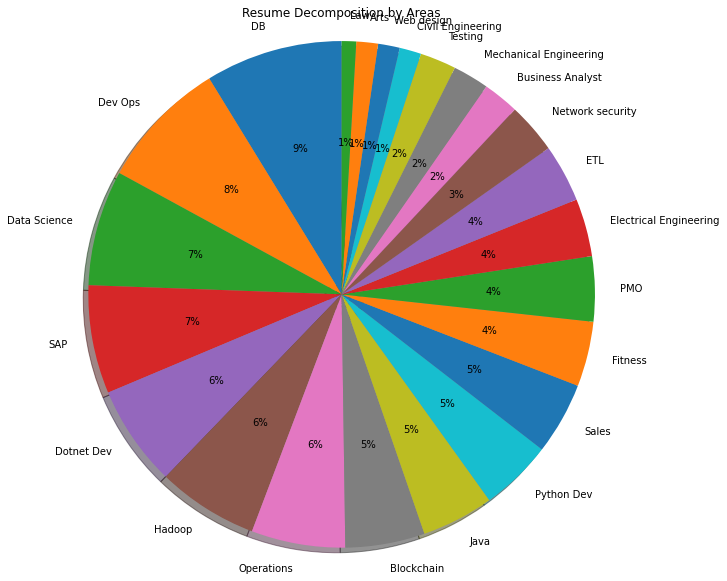

In [78]:
# Create pie chart visualization
pie = plt.figure(figsize=(10,10))
plt.pie(summary['score'], labels=summary.index, autopct='%1.0f%%',shadow=True,startangle=90)
plt.title('Resume Decomposition by Areas')
plt.axis('equal')
plt.show()